In [1]:
import pandas as pd
import numpy as np

In [87]:
comp = pd.read_csv(r'C:\Users\dell\Downloads\Fraud_check.csv')

In [88]:
comp

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <a list of 10 Patch objects>)

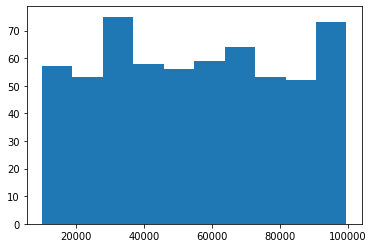

In [89]:
import matplotlib.pyplot as plt
plt.hist(comp['Taxable.Income'])

In [90]:
comp.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [91]:
comp.rename(columns = {'Taxable.Income':'Taxable_Income'}, inplace = True)

In [92]:
comp.rename(columns = {'Marital.Status':'Marital_Status'}, inplace = True)

In [93]:
comp.loc[comp.Taxable_Income <= 30000,"Taxable_Income"]=0
comp.loc[comp.Taxable_Income > 30000,"Taxable_Income"]=1

In [94]:
comp

,Undergrad,Marital_Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [95]:
comp = pd.concat([comp.drop('Urban', axis=1), pd.get_dummies(comp['Urban'])], axis=1)
comp = pd.concat([comp.drop('Undergrad', axis=1), pd.get_dummies(comp['Undergrad'])], axis=1)
comp = pd.concat([comp.drop('Marital_Status', axis=1), pd.get_dummies(comp['Marital_Status'])], axis=1)

In [96]:
comp

,Taxable_Income,City.Population,Work.Experience,NO,YES,NO,YES,Divorced,Married,Single
0,1,50047,10,0,1,1,0,0,0,1
1,1,134075,18,0,1,0,1,1,0,0
2,1,160205,30,0,1,1,0,0,1,0
3,1,193264,15,0,1,0,1,0,0,1
4,1,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,0,1,1,0,0
596,1,55369,2,0,1,0,1,1,0,0
597,1,154058,0,0,1,1,0,1,0,0
598,1,180083,17,1,0,0,1,0,1,0


In [97]:
comp.columns = ['Taxable_Income','City.Population', 'Work.Experience', 'NO', 'YES', 'NO1', 'YES1',
       'Divorced', 'Married', 'Single']

In [98]:
x=comp.drop(['Taxable_Income'],axis='columns')
y=comp.Taxable_Income

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler=MinMaxScaler()

In [101]:
scale=scaler.fit_transform(x)

In [102]:
scale

array([[0.13947207, 0.33333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.77256766, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.73723987, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.88680969, 0.56666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [103]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [104]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(480, 9)
(480,)
(120, 9)
(120,)


In [105]:
from sklearn.ensemble import RandomForestClassifier
model  =  RandomForestClassifier()

In [106]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
model.estimators_ 

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1518574946, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1454771392, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_y,model.predict(train_x))

array([[ 98,   0],
       [  0, 382]], dtype=int64)

In [109]:
confusion_matrix(test_y,model.predict(test_x))

array([[ 3, 23],
       [ 7, 87]], dtype=int64)

In [110]:
import xgboost as xgb
xgboost=xgb.XGBClassifier()

In [111]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10}

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
rs_clf = RandomizedSearchCV(xgboost, param_distributions=param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2, refit=False, random_state=42)

In [114]:
rs_clf.fit(x,y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.1s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.1s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4 
[CV]  subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.9s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                          

In [115]:
rs_clf.best_params_

{'subsample': 0.7,
 'silent': False,
 'reg_lambda': 50.0,
 'n_estimators': 100,
 'min_child_weight': 5.0,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 1.0,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.4}

In [116]:
sds=xgb.XGBClassifier(subsample= 0.7,
 silent= False,
 reg_lambda= 50.0,
 n_estimators= 100,
 min_child_weight= 5.0,
 max_depth= 6,
 learning_rate= 0.2,
 gamma= 1.0,
 colsample_bytree= 0.9,
 colsample_bylevel= 0.4)

In [117]:
sds.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1.0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=50.0, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.7, verbosity=1)

In [119]:
y_pred=sds.predict(train_x)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(train_y,y_pred)

0.7958333333333333

In [122]:
sds.predict(test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [123]:
accuracy_score(test_y,sds.predict(test_x))

0.7833333333333333